In [1]:
import pandas as pd

In [21]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [22]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
len(data_ads)

200

In [6]:
import numpy as np

In [9]:
#Vamos a añadir una nueva columna en el dataset que va a ser el Coeficiente de Correlación de Pearson que nos dira si
#en este caso hay correlación entre la inversión en anuncios de "TV" y las ventas "Sales". La formula esta en el cuaderno.
#Paso 1- Dividendo de la formula
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"]))* (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [10]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [11]:
#Paso 2- Divisor parte de la TV
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [12]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [13]:
#Paso 3- Divisor parte de las Sales
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [14]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [15]:
#Paso 4 - Resultado total 
corrn = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [16]:
corrn

0.782224424861606

In [17]:
#Como vemos que el valor del Coeficiente de Correlación esta por encima de 0,5 estimamos que hay una 
# correlación bastante importante entre lo que se invierte en TV y las ventas Sales.

In [18]:
# Esta función nos permite calcular el correlación de la información de df, de las variables var 1 y var 2.
def corr_coeff(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1]))* (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [19]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [20]:
corr_coeff(data_ads, "Radio", "Sales")

0.5762225745710553

In [ ]:
corr_coeff(data_ads, "Radio", "Sales")

In [24]:
cols = data_ads.columns.values

In [25]:
for x in cols:
    for y in cols:
        print(x + ", "+ y + " : " + str(corr_coeff(data_ads, x, y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0


In [27]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

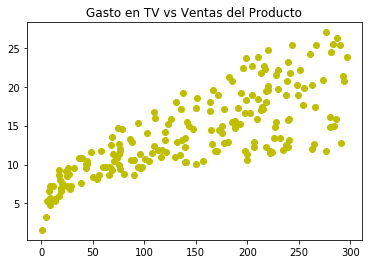

In [28]:
plt.plot(data_ads["TV"], data_ads["Sales"], "yo")
plt.title("Gasto en TV vs Ventas del Producto")

In [ ]:
# Se aprecia una correlación lineal positiva. Como indica que el coeficiente sea > 0,5

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

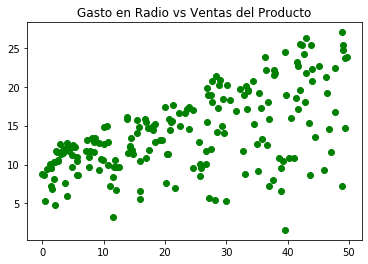

In [32]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del Producto")

In [33]:
# Se aprecia una correlación mas débil aunque se sigue observando una lineal positiva. Como indica que el coeficiente estaba entorno al 0,5

Text(0.5,1,'Gasto en Periódico vs Ventas del Producto')

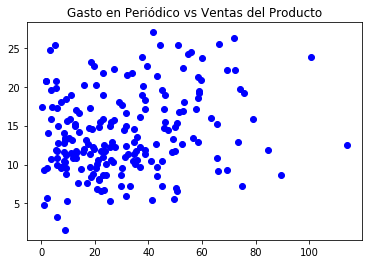

In [34]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Periódico vs Ventas del Producto")

In [34]:
# No se aprecia correlación. Coeficinte es mucho menor 0,5 es casi casual.

In [35]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")
# TODOS ESTOS CALCULOS MANUALES PARA SACRA EL COEFICIENTE DE CORRELACIÓN YA NOS LOS OBTIENE pandas en una función
# corr().
data_ads.corr()
# Nos muestra una matriz con los Coeficientes de Correlación de Pearson

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


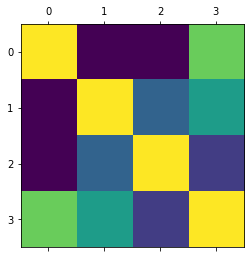

In [36]:
#AHORA PINTAMOS UNA MATRIZ CON LOS VALORES DE LA MATRIZ DE CORRLACIÓN.
#ASI DE FORMA VISUAL RAPIDAMENTE VEMOS QUE VARIABLES TIENEN UNA FERTA CORRELACIÓN Y CUALES NO.
plt.matshow(data_ads.corr())
